In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
chipo = pd.read_csv("/content/drive/MyDrive/2022-01/빅데이터마이닝/chipotle.csv")

chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [5]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


## 1)  가장 잘 팔리지 않은 (주문량이 가장 적은) 음식 10개

In [6]:
# 주문량이 적은 음식 TOP 10 보여주기
order_quantity = chipo.groupby('item_name')['quantity'].sum()
order_sorted = order_quantity.sort_values(ascending=True)[0:10]
print(order_sorted)

item_name
Carnitas Salad                       1
Veggie Crispy Tacos                  1
Chips and Mild Fresh Tomato Salsa    1
Crispy Tacos                         2
Salad                                2
Bowl                                 4
Steak Salad                          4
Veggie Salad                         6
Carnitas Salad Bowl                  6
Burrito                              6
Name: quantity, dtype: int64


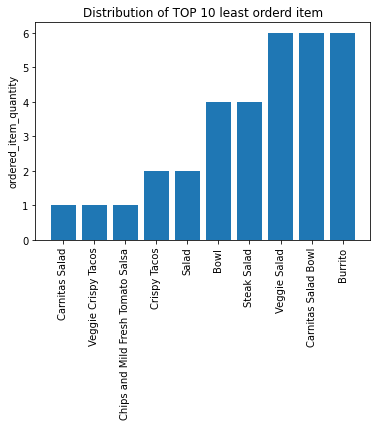

In [7]:
item_list = order_sorted.index.tolist()
item_qty = order_sorted.values.tolist()
 
plt.bar(item_list, item_qty, align='center')
plt.ylabel('ordered_item_quantity')
plt.title('Distribution of TOP 10 least orderd item')
plt.xticks(rotation=90) 
plt.show()

## 2)  가격이 가장 저렴한 음식 5개를 보여주세요. 

In [10]:
# item_price의 $ 문자 삭제
chipo['item_price'] = chipo['item_price'].apply(lambda x:float(x[1:]))

In [11]:
# 한 개의 음식이 주문 된 경우만을 찾아 음식별 가장 낮은 가격 찾기
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name')['item_price'].min() 

# 가격이 낮은 순으로 TOP 5 음식 보여주기
inexpensive_top5 = price_per_item.sort_values(ascending = True)[:5]
print(inexpensive_top5)

item_name
Bottled Water        1.09
Canned Soda          1.09
Canned Soft Drink    1.25
Side of Chips        1.69
Chips                1.99
Name: item_price, dtype: float64


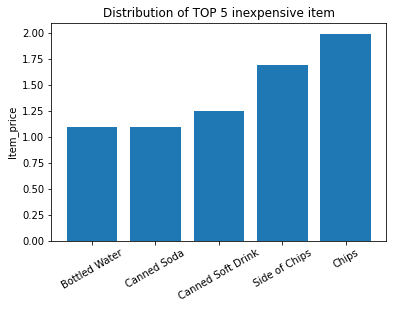

In [12]:
# 음식 가격 분포 그래프 출력
item_list = inexpensive_top5.index.tolist()
item_qty = inexpensive_top5.values.tolist()
 
plt.bar(item_list, item_qty, align='center')
plt.ylabel('Item_price')
plt.title('Distribution of TOP 5 inexpensive item')
plt.xticks(rotation=30)
plt.show()